# The dataloader class fro pytorch

In [1]:
from PIL import Image
import numpy as np
import torch as torch
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from pprint import pprint
import dltools

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print("available device : ",device)

available device :  cuda


In [3]:
class_names = { 0 : "Parasitized", 1 : "Uninfected" }
path_Parasitized = "/home/rishi/Deep\ Learning/data/cell_images/Parasitized/"
path_Uninfected = "/home/rishi/Deep\ Learning/data/cell_images/Uninfected/"

In [4]:
Parasitized_list = !ls $path_Parasitized
pprint(Parasitized_list[:5])

Uninfected_list = !ls $path_Uninfected
pprint(Uninfected_list[:5])

['C100P61ThinF_IMG_20150918_144104_cell_162.png',
 'C100P61ThinF_IMG_20150918_144104_cell_163.png',
 'C100P61ThinF_IMG_20150918_144104_cell_164.png',
 'C100P61ThinF_IMG_20150918_144104_cell_165.png',
 'C100P61ThinF_IMG_20150918_144104_cell_166.png']
['C100P61ThinF_IMG_20150918_144104_cell_128.png',
 'C100P61ThinF_IMG_20150918_144104_cell_131.png',
 'C100P61ThinF_IMG_20150918_144104_cell_144.png',
 'C100P61ThinF_IMG_20150918_144104_cell_21.png',
 'C100P61ThinF_IMG_20150918_144104_cell_25.png']


In [5]:
class Data(Dataset):
    
    def __init__(self, folder_path, infected_list, uninfected_list, device):
        
        super(Data, self).__init__()
        
        self.path = folder_path
        
        self.classes = { 0 : infected_list, 1 : uninfected_list }
        
        self.marker = len(self.classes[0])
        
        self.lenth = len(self.classes[0]) + len(self.classes[1])
        self.transform = transforms.Compose([transforms.ToTensor()])
        
        return
    
    def __getitem__(self, inx):
        
        
        if inx - self.marker < 0:
            index = inx
            cls = 0
        
        else :
            index = inx - self.marker
            cls = 1
        
        path = self.path + class_names[cls] + '/' + self.classes[cls][index]
        
        image = Image.open(path).resize((128,128))        
        image = self.transform(image)
        label = torch.tensor(cls, dtype = torch.float, device = device)
        
        return image, label
    
    def __len__(self):
        return self.lenth



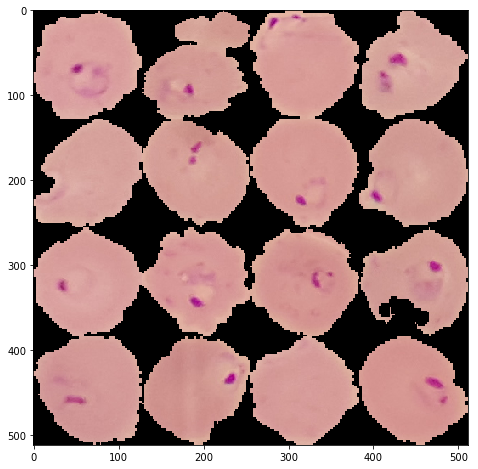

In [6]:
folder_path = "/home/rishi/Deep Learning/data/cell_images/"

data = Data(folder_path, Parasitized_list, Uninfected_list, device)

loader = DataLoader(data, batch_size=16, shuffle=False, num_workers=0)

iterator = iter(loader)
sample = iterator.next()

plt.figure(figsize=(8,8))
plt.imshow(dltools.make_image_grid(sample,4,4))